In [39]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [44]:


def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1) 
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1 
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise 
    return time, series[..., np.newaxis].astype(np.float32)

In [45]:
n_steps = 50
time, series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [73]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [76]:
X_train[:,:,-1].shape

(7000, 50, 1)

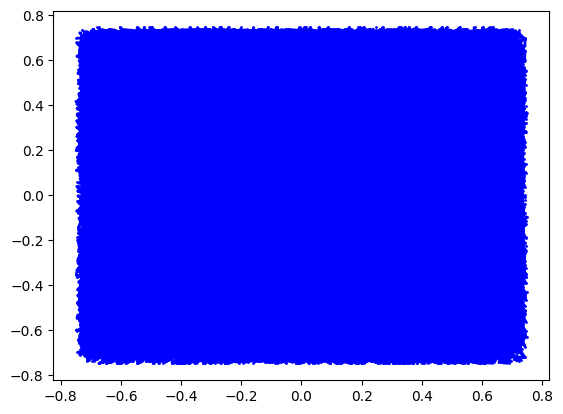

In [77]:
plt.plot(X_train[:,:,-1], y_train[:, -1], 'bo--', linewidth=2, markersize=1)
plt.show()

In [46]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020598236

In [47]:
model = keras.models.Sequential([
      tf.keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
model.compile(loss='mean_squared_error')
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 4ms/step - loss: 0.4618 - val_loss: 0.4316
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.4110 - val_loss: 0.3846
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.3638 - val_loss: 0.3393
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.3188 - val_loss: 0.2947
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2745 - val_loss: 0.2518
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2325 - val_loss: 0.2119
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1941 - val_loss: 0.1761
Epoch 8/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1616 - val_loss: 0.1461
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1346 - val_loss: 0.1227
Epoch 10/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1116 - val_loss: 0.0964

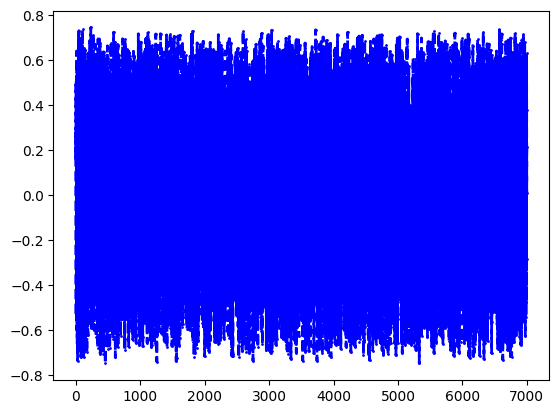